# <span style="color:black"> Esercitazioni - lezione 1 </span>

## <span style="color:black"> Esercizio 01.1 </span>

Al fine di testare il Generatore di numeri pseudo-casuali fornito, si è eseguita una stima dell'integrale $\int_0^1 r dr = \langle r \rangle = 1/2$  e successivamente di $\int_0^1 (r-1/2)^2 dr = \sigma^2 = 1/12$. Sono quindi riportati i grafici relativi rispettivamente alla media e alla deviazione standard (traslata di un fattore $-\frac{1}{12}$). E' stato usato il metodo dei blocchi per avere una stima del valor medio e dell'incertezza statistica. E' quindi riportato sulle ascisse il numero di blocchi (è stato scelto 100 come numero adeguato di blocchi per un campionamento di $10^4$ punti - corrispondenti ai lanci di un dado), mentre la barra d'errore è data dall'incertezza statistica.

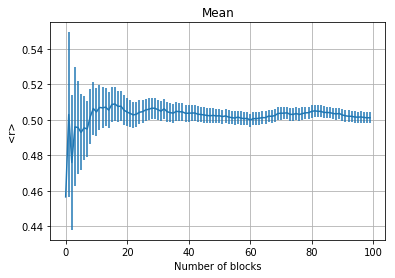

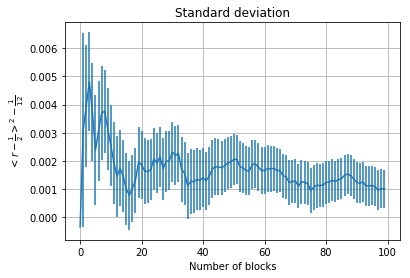

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x1, f1, error1 = np.loadtxt('Es01.1.1.res', usecols=(0,1,2), unpack='true')

plt.errorbar(x1, f1, yerr=error1)
plt.xlabel("Number of blocks")
plt.ylabel("<r>")
plt.grid()
plt.title("Mean")
plt.show()

x2, f2, error2 = np.loadtxt('Es01.1.2.res', usecols=(0,1,2), unpack='true')

plt.errorbar(x2, f2-1/12, yerr=error2)
plt.xlabel("Number of blocks")
plt.ylabel(r'$<r-\frac{1}{2}>^2-\frac{1}{12}$')
plt.grid()
plt.title("Standard deviation")
plt.show()

Dai grafici emerge la consistenza statistica dei risultati, sempre abbondantemente contenuti entro $2\sigma$, per un numero elevato di blocchi utilizzati. Si ricorda che da ogni blocco emerge valor medio e incertezza relativa ad un campione di 100 *"lanci"*

Si è da ultimo effettuato un test del $\chi^2$ per validare l'ipotesi che i valori siano generati a partire da una distribuzione uniforme. L'indicatore è definito come 
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
dove si è diviso l'intervallo [0,1] in $M=100$ intervalli, si è quindi usato come valore osservato $O_i$ il numero di punti appartenenti all'intervallo i-esimo, e come valore di aspettazione $E_i$ il valore atteso per una distribuzione uniforme $E_i=n/M$ con $n$ numero di lanci.

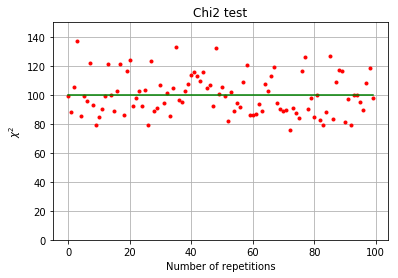

In [2]:
x, chi2 = np.loadtxt('Es01.1.3.res', usecols=(0,1), unpack='true')
plt.plot(x, chi2, 'r.')
plt.plot(x, 100+x-x, 'g')
plt.ylim(0, 150);
plt.grid()
plt.ylabel(r'$\chi^2$')
txt="Caption"
plt.xlabel('Number of repetitions')
plt.title('Chi2 test')
plt.show()

Nel grafico è stata disegnata in verde la linea attesa per una distribuzione uniforme: si nota la consistenza statistica con i valori calcolati, che effettivamente fluttuano intorno al valore atteso.

## <span style="color:black"> Esercizio 01.2 </span>
In questo esercizio sono stati implementati due metodi al generatore di numeri casuali per generare distribuzioni di probabilità esponenziale e lorentziana utilizzando il metodo dell'inversa della funzione cumulativa.

In particolare si ha per l'esponenziale ($p \in \left[0,1\right)$): 
$$p(x)=\lambda exp(-\lambda x) \Rightarrow Q(p)=-\frac{ln(1-p)}{\lambda}$$
mentre per la Cauchy-Lorentz:
$$p(x)=\frac{1}{\pi}\cdot \frac{\Gamma}{(x-x_0)^2+\Gamma^2} \Rightarrow Q(p)=x_0+\gamma \mathrm {tan}\left[\pi\left(p-\frac{1}{2}\right)\right]$$


Si è quindi verificata la validità del teorema del limite centrale: all'aumentare del numero N di lanci la somma di eventi a distribuzione di probabilità con varianza finita tende ad una distribuzione normale. D'altro canto altre distribuzioni con varianza infinta (in figura una distribuzione di Cauchy-Lorentz) tendono alla rispettiva distribuzione stabile del bacino di convergenza (in questo caso la medesima Lorentziana).

N.B. Si dice *stabile* una densità di probabilità se è invariante sotto convoluzione, ovvero se 
$$ p(a_1x+b_1)*p(a_2x+b_2):=\int_{-\infty}^{\infty}p(a_1(y-x)+b_1)p(a_2x+b_2)dx=p(ay+b)$$
per ogni valore reale delle costanti $a_1>0, a_2>0, b_1, b_2$


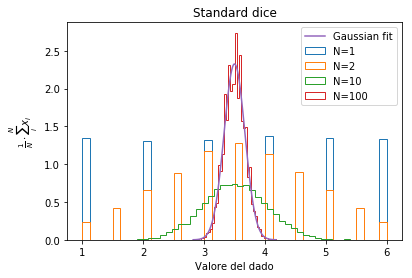

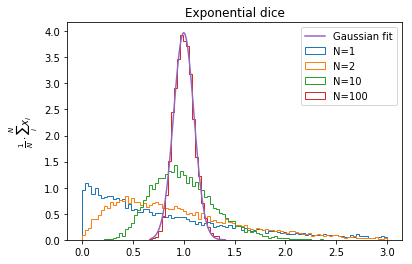

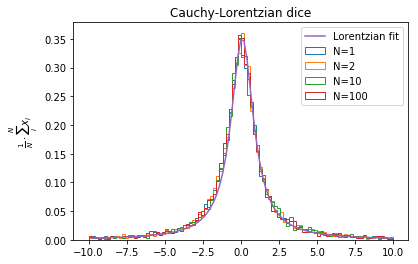

In [26]:
from scipy.optimize import curve_fit

def f(x,avg,var):  # defining the fitting function
    return 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
def f1(x,x0,g):  # defining the fitting function
    return g/(np.pi*((x-x0)**2+g**2))

#-------------------FIGURA 1---------------------------
n1, n2, n3, n4 = np.loadtxt("Es01.2.1.res", usecols=(0,1,2,3), unpack='true')

n_bins = 40
plt.hist(n1, n_bins, label='N=1', histtype='step', density='true')
plt.hist(n2, n_bins, label='N=2', histtype='step', density='true')
plt.hist(n3, n_bins, label='N=10', histtype='step', density='true')
plt.hist(n4, n_bins, label='N=100', histtype='step', density='true')

avg = np.mean(n4)
var = np.var(n4)
pdf_x = np.linspace(np.min(n4),np.max(n4),100)
plt.plot(pdf_x,f(x,avg,var), label='Gaussian fit')

plt.ylabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')
plt.xlabel(r'Valore del dado')
plt.title('Standard dice')
plt.legend(loc='upper right')

plt.show()

#-------------------FIGURA 2---------------------------
n1, n2, n3, n4 = np.loadtxt("Es01.2.2.res", usecols=(0,1,2,3), unpack='true')

n_bins = 100
plt.hist(n1, n_bins, range=(0,3), label='N=1', histtype='step', density='true')
plt.hist(n2, n_bins, range=(0,3), label='N=2', histtype='step', density='true')
plt.hist(n3, n_bins, range=(0,3), label='N=10', histtype='step', density='true')
plt.hist(n4, n_bins, range=(0,3), label='N=100', histtype='step', density='true')

avg = np.mean(n4)
var = np.var(n4)
pdf_x = np.linspace(np.min(n4),np.max(n4),100)
plt.plot(pdf_x,f(x,avg,var), label='Gaussian fit')

plt.ylabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')
plt.title('Exponential dice')
plt.legend(loc='upper right')

plt.show()

#-------------------FIGURA 3---------------------------
n1, n2, n3, n4 = np.loadtxt("Es01.2.3.res", usecols=(0,1,2,3), unpack='true')

n_bins = 100
plt.hist(n1, n_bins, range=(-10,10), label='N=1', histtype='step', density='true')
plt.hist(n2, n_bins, range=(-10,10), label='N=2', histtype='step', density='true')
plt.hist(n3, n_bins, range=(-10,10), label='N=10', histtype='step', density='true')
n, bins, patches = plt.hist(n4, n_bins, range=(-10,10), label='N=100', histtype='step', density='true')

p_opt, p_cov = curve_fit(f1, bins[1:101], n, bounds=([-2,0],[2,3]))
y_fit = f1(bins[1:101],p_opt[0],p_opt[1])
plt.plot(bins[1:101],y_fit, label='Lorentzian fit') # plotting fitted function

plt.ylabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')
plt.title('Cauchy-Lorentzian dice')
plt.legend(loc='upper right')

plt.show()




Si noti che per verificare l'effettiva convergenza alla distribuzione attesa si è eseguito un fit sugli istogrammi realizzati per $N=100$ con funzioni Gaussiane o di Cauchy-Lorentz

N.B. Gli istogrammi sono stati normalizzati in modo che l'area delimitata da ogni istogramma sia pari a $1$.

## <span style="color:black"> Esercizio 01.3 </span>

L'esperimento di Buffon constiste nello stimare il valore di $\pi$ a partire dall'osservazione del lancio di molte barrette su un piano dotato di righe equidistanti. Il valore di $\pi$ è quindi dato da:
$$\pi=\frac{2L}{Pd}=\lim_{N_{th}\to\infty}\frac{2LN_{th}}{N_{hit}d}$$
dove $L$ è la lunghezza della barretta, $d$ la distanza tra le righe, $N_{th}$ il numero di lanci e infine $N_{hit}$ il numero di barrette che cadono su una riga.
Per simulare il lancio di una barretta si è proceduto nel modo seguente: si è generata uniformemente una distanza $x_0$ tale che $0\leq x_0<d$ e un angolo $0\leq\theta\leq\pi$. Per generare $\theta$ nell'intervallo richiesto senza utilizzare il valore di $\pi$, si sono generati due valori $x\in\left[-1,1\right]$ e $y\in\left[0,1\right]$; Una volta controllato che $x^2+y^2<1$, allora 
$$\theta=cos^{-1}\left(\frac{x}{\sqrt{x^2+y^2}}\right)$$
uniformemente distribuito in $[0,2\pi]$

<img src="img.jpg" width=300>

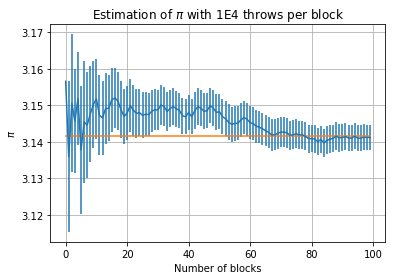

In [26]:
x1, f1, error1 = np.loadtxt('Es01.3.res', usecols=(0,1,2), unpack='true')

plt.errorbar(x1, f1, yerr=error1)
plt.plot(np.pi+x-x)
plt.title(r'Estimation of $\pi$ with 1E4 throws per block')
plt.xlabel("Number of blocks")
plt.ylabel(r'$\pi$')
plt.grid()
plt.show()

Si nota la convergerza statistica al valore nominale di $\pi$ (evidenziato con una riga arancione) in ottimo accordo.